In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


# Load and Explore the Dataset

In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")

In [32]:
# Explore the dataset
print("------------------------------------------------------------------------")
print("Show the first few rows of the dataset")
print("------------------------------------------------------------------------")
print(df.head())  # Show the first few rows of the dataset
print("------------------------------------------------------------------------")
print("Show information about the dataset")
print("------------------------------------------------------------------------")
print(df.info())  # Show information about the dataset
print("------------------------------------------------------------------------")
print("Show summary statistics of the dataset")
print("------------------------------------------------------------------------")
print(df.describe())  # Show summary statistics of the dataset
print("------------------------------------------------------------------------")
print("Show the shape of the dataset")
print("------------------------------------------------------------------------")
print(df.shape)  # Show the shape of the dataset
print("------------------------------------------------------------------------")
print("Show the size of the dataset")
print("------------------------------------------------------------------------")
print(df.size)  # Show the size of the dataset
print("------------------------------------------------------------------------")
print("Show the column names")
print("------------------------------------------------------------------------")
print(df.columns)  # Show the column names
print("------------------------------------------------------------------------")
print("Show the index")
print("------------------------------------------------------------------------")
print(df.index)  # Show the index
print("------------------------------------------------------------------------")
print("------------------------------------------------------------------------")

------------------------------------------------------------------------
Show the first few rows of the dataset
------------------------------------------------------------------------
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1     

# Check for Missing Values

In [4]:
# Check for missing values
print(df.isnull().sum())  # Show the number of missing values in each column
print(df.isnull().values.any())  # Check if there are any missing values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
False


# Explore Categorical Variables

In [5]:
# Explore the distribution of categorical variables
print(df["Geography"].unique())  # Show the unique values in the Geography column
print(df["Gender"].unique())  # Show the unique values in the Gender column
print(df["NumOfProducts"].unique())  # Show the unique values in the NumOfProducts column
print(df["HasCrCard"].unique())  # Show the unique values in the HasCrCard column
print(df["IsActiveMember"].unique())  # Show the unique values in the IsActiveMember column
print(df["Exited"].unique())  # Show the unique values in the Exited column

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]
[1 0]


# Visualize Categorical Variables

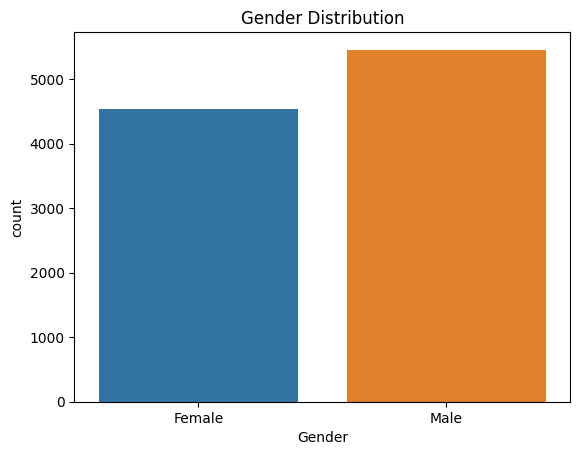

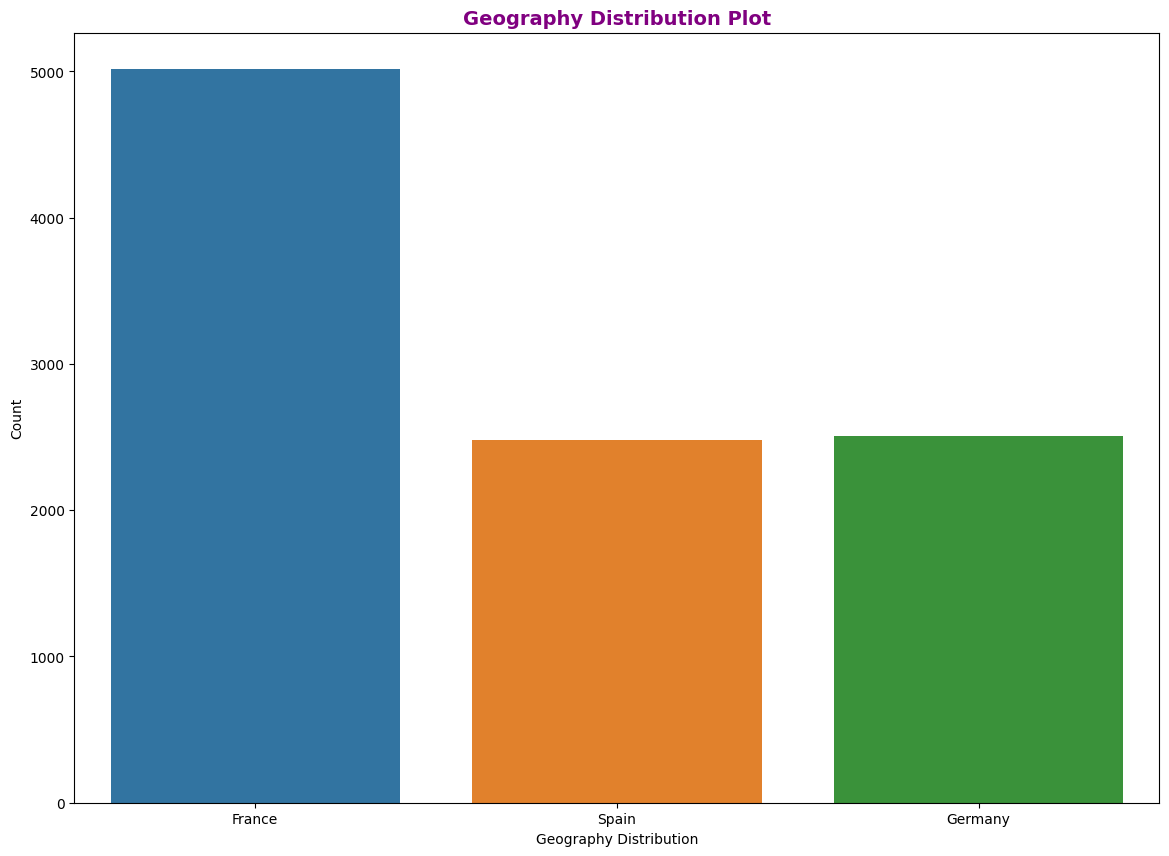

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


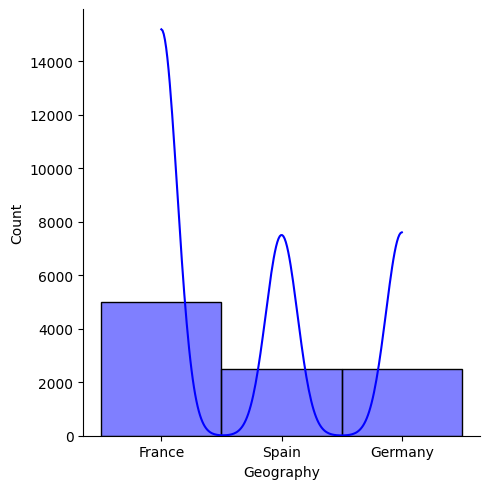

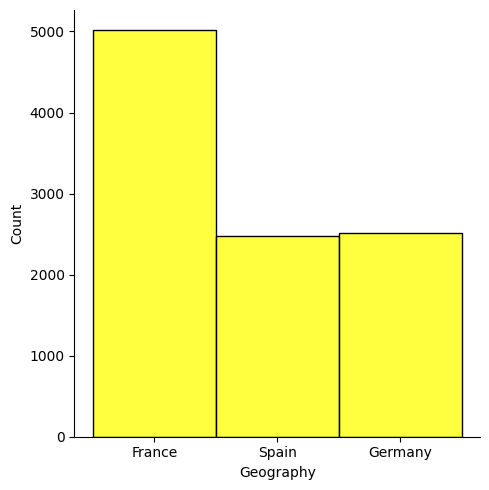

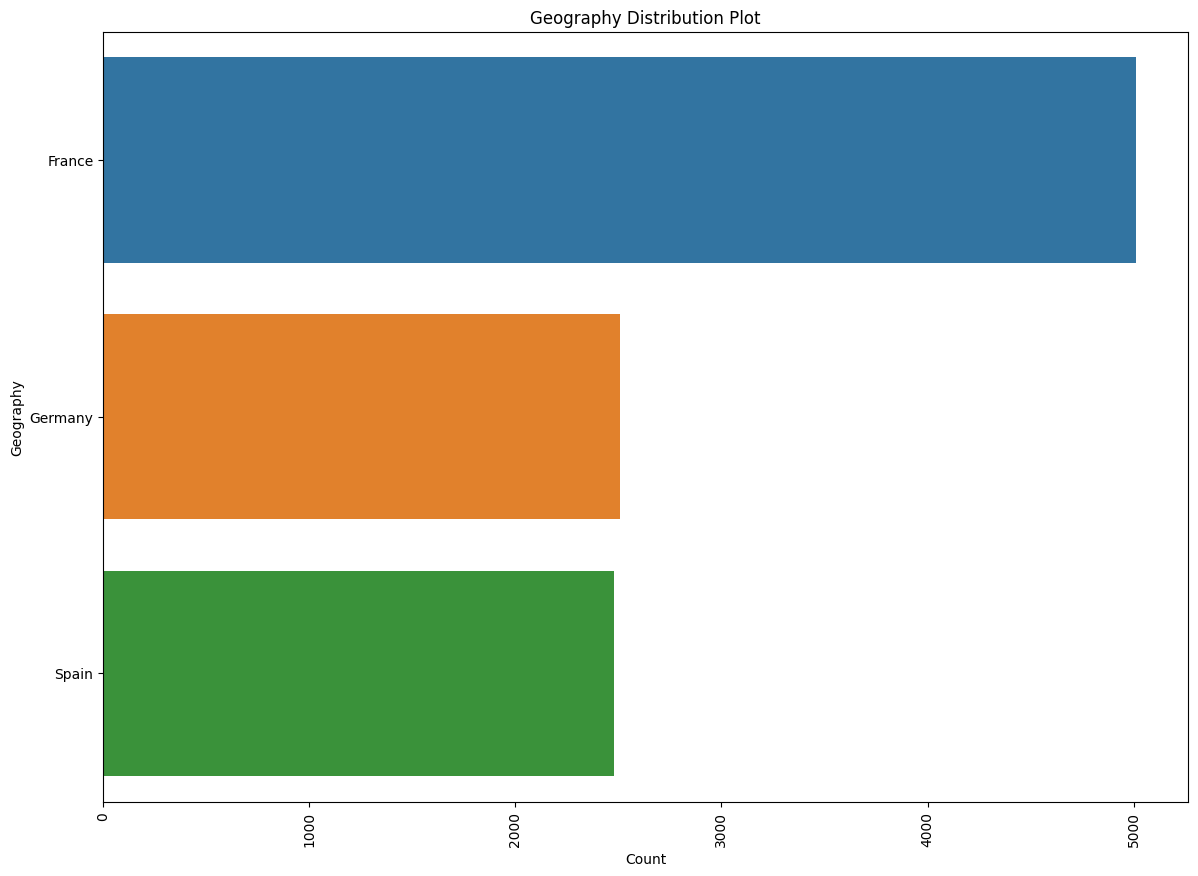

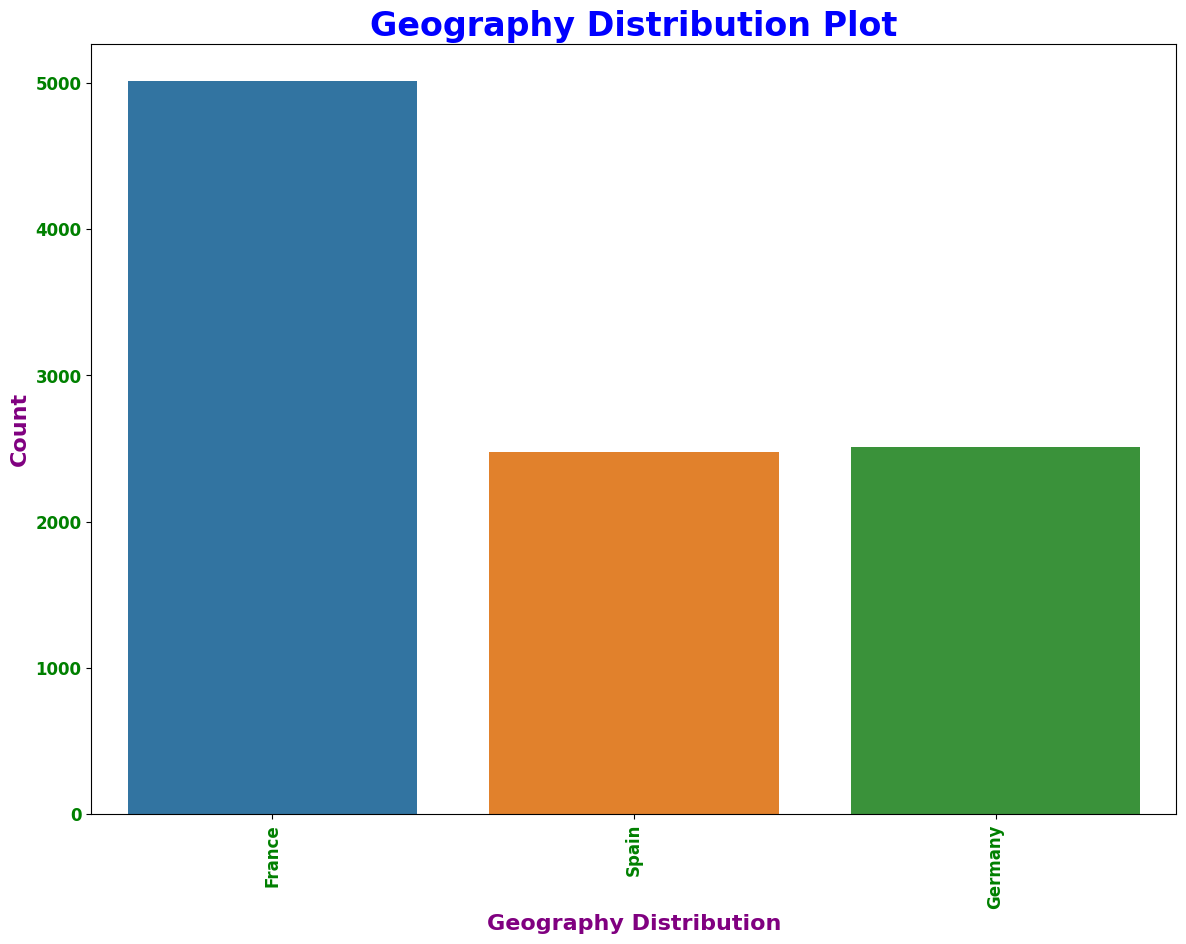

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of categorical variables
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize=(14,10))
sns.countplot(x='Geography', data=df)
plt.xlabel('Geography Distribution')
plt.ylabel('Count')
plt.title('Geography Distribution Plot', fontsize=14, fontweight="bold", color="purple")
plt.show()

sns.displot(df.Geography, kde=True, color="blue")
sns.displot(df.Geography, color="yellow")
plt.figure(figsize=(14,10))
count1 = df.Geography.value_counts()
sns.barplot(x=count1, y=count1.index, orient='h')
plt.xlabel('Count')
plt.ylabel('Geography')
plt.title('Geography Distribution Plot')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14, 10))
sns.countplot(x='Geography', data=df)
plt.xlabel('Geography Distribution', fontsize=16, fontweight='bold', color='purple')
plt.ylabel('Count', fontsize=16, fontweight='bold', color='purple')
plt.title('Geography Distribution Plot', fontsize=24, fontweight='bold', color='blue')
plt.xticks(rotation=90, fontsize=12, fontweight='bold', color='green')
plt.yticks(fontsize=12, fontweight='bold', color='green')
plt.show()

# Preprocess the Data

In [7]:
# Preprocess the data
df.drop(labels=["RowNumber","CustomerId","Surname"], axis=1, inplace=True)
df = pd.get_dummies(df, drop_first=True)

# Split the Data into Training and Testing Sets

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df.drop("Exited", axis=1)
y = df["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the Data

In [9]:
from sklearn.preprocessing import StandardScaler

# Scale the data
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

# Train and Evaluate Models


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    accuracy_score, 
    r2_score, 
    precision_score, 
    recall_score, 
    f1_score
)


# Logistic Regression Model


In [26]:
# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Logistic Regression Model:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(f"Accuracy: {accuracy_score(y_test, predictions):.3f}")
print(f"r2_Score: {r2_score(y_test, predictions):.3f}")
print(f"Precision_score: {precision_score(y_test, predictions):.3f}")
print(f"Recall_score: {recall_score(y_test, predictions):.3f}")
print(f"f1_score: {f1_score(y_test, predictions):.3f}")


Logistic Regression Model:
[[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Accuracy: 0.811
r2_Score: -0.197
Precision_score: 0.552
Recall_score: 0.201
f1_score: 0.295


# Random Forest Model


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
model = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Random Forest Model:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(f"Accuracy: {accuracy_score(y_test, predictions):.3f}")
print(f"r2_Score: {r2_score(y_test, predictions):.3f}")
print(f"Precision_score: {precision_score(y_test, predictions):.3f}")
print(f"Recall_score: {recall_score(y_test, predictions):.3f}")
print(f"f1_score: {f1_score(y_test, predictions):.3f}")

Random Forest Model:
[[1547   60]
 [ 209  184]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Accuracy: 0.866
r2_Score: 0.148
Precision_score: 0.754
Recall_score: 0.468
f1_score: 0.578


# Gradient Boosting Model

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Model
model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.02, max_depth=1, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Gradient Boosting Model:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(f"Accuracy: {accuracy_score(y_test, predictions):.3f}")
print(f"r2_Score: {r2_score(y_test, predictions):.3f}")
print(f"Precision_score: {precision_score(y_test, predictions):.3f}")
print(f"Recall_score: {recall_score(y_test, predictions):.3f}")
print(f"f1_score: {f1_score(y_test, predictions):.3f}")

Gradient Boosting Model:
[[1550   57]
 [ 224  169]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1607
           1       0.75      0.43      0.55       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000

Accuracy: 0.860
r2_Score: 0.110
Precision_score: 0.748
Recall_score: 0.430
f1_score: 0.546
